# Auswertung Generative KI Umfrage

Dieses Notebook dient der explorativen Datenanalyse der Umfrage zur Nutzung von Generativer KI im Unternehmenskontext.
Bitte stelle sicher, dass die Datei `results-survey.csv` im gleichen Verzeichnis liegt und korrekt formatiert ist.

In [1]:
# Pakete importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anzeigeoptionen
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
# CSV-Datei laden (Dateiname ggf. anpassen)
file_path = 'results-survey.csv'
df = pd.read_csv(file_path)
df.head()

,Antwort ID,Datum Abgeschickt,Letzte Seite,Start-Sprache,Zufallsgeneratorstartwert,Datum gestartet,Datum letzte Aktivität,Bitte geben Sie Ihren Nachnamen an:,Bitte geben Sie Ihren Vornamen an:,Bitte geben Sie Ihr Geschlecht an:,Bitte geben Sie Ihre Altersgruppe an:,Bitte geben Sie Ihre Studenten E-Mail Adresse ein:,Wie häufig nutzen Sie aktuell generative KI im Arbeitskontext? [Benutzung KI],Kommentar,"Wo setzen Sie Generative KI typischerweise ein? [Texterstellung und -bearbeitung (z.B. Verfassung von Mails, Artikel oder Zusammenfassungen)]","Wo setzen Sie Generative KI typischerweise ein? [Kreative Inhalte erstellen (z.B. Bilder, Musik, Videos, Designs etc.)]","Wo setzen Sie Generative KI typischerweise ein? [Programmieren und Automatisieren (z.B. Code schreiben, Fehler beheben etc.)]","Wo setzen Sie Generative KI typischerweise ein? [Lernen und Bildung (z.B. individuelle Erklärungen, Zusammenfassungen, Lernhilfe etc.)]","Wo setzen Sie Generative KI typischerweise ein? [Kommunikation und Übersetzung verbessern (z.B. Korrektur von Texten, Übersetzungen von Artikeln etc.)]",Kommentar.1,Welche Erwartungen hatten Sie an die Generative KI vor der Nutzung? [Effizienz],Welche Erwartungen hatten Sie an die Generative KI vor der Nutzung? [Kreativität],Welche Erwartungen hatten Sie an die Generative KI vor der Nutzung? [Arbeitsentlastung],Welche Erwartungen hatten Sie an die Generative KI vor der Nutzung? [Zuverlässigkeit],Welche Erwartungen hatten Sie an die Generative KI vor der Nutzung? [Innovation],Kommentar.2,Welche dieser Erwartungen wurden erfüllt? [Effizienz][Skala 1],Welche dieser Erwartungen wurden erfüllt? [Effizienz][Skala 2],Welche dieser Erwartungen wurden erfüllt? [Kreativität][Skala 1],Welche dieser Erwartungen wurden erfüllt? [Kreativität][Skala 2],Welche dieser Erwartungen wurden erfüllt? [Arbeitsentlastung][Skala 1],Welche dieser Erwartungen wurden erfüllt? [Arbeitsentlastung][Skala 2],Welche dieser Erwartungen wurden erfüllt? [Zuverlässigkeit][Skala 1],Welche dieser Erwartungen wurden erfüllt? [Zuverlässigkeit][Skala 2],Welche dieser Erwartungen wurden erfüllt? [Innovation][Skala 1],Welche dieser Erwartungen wurden erfüllt? [Innovation][Skala 2],Kommentar.3,Welche positiven Erfahrungen habe Sie mit Generativer KI gemacht? [Zeitersparnis],Welche positiven Erfahrungen habe Sie mit Generativer KI gemacht? [Kreative Impulse],Welche positiven Erfahrungen habe Sie mit Generativer KI gemacht? [Entlastung (Zeit + Aufwand)],Welche positiven Erfahrungen habe Sie mit Generativer KI gemacht? [Qualität],Welche positiven Erfahrungen habe Sie mit Generativer KI gemacht? [Keine bemerkbaren Effekte],Kommentar.4,Welche negativen Erfahrungen haben Sie mit Generativer KI gemacht? [Ungenaue Resultate],Welche negativen Erfahrungen haben Sie mit Generativer KI gemacht? [Fehlender Datenschutz],Welche negativen Erfahrungen haben Sie mit Generativer KI gemacht? [Verbreitung von Fehlinformationen (Fake News)],Welche negativen Erfahrungen haben Sie mit Generativer KI gemacht? [Abhängigkeit von Technologie],Welche negativen Erfahrungen haben Sie mit Generativer KI gemacht? [Verlust von Originalität / menschlicher Kreativität],Kommentar.5,Wie stark vertrauen Sie den Resultaten von Generativer KI?,Kommentar.6,Hat Generative KI Ihre Arbeitsweise verändert?,Kommentar.7,Wie kompetent fühlen Sie sich im Umgang mit Generativer KI?,Kommentar.8,Hatten Sie Schulungen oder Trainings im Zusammenhang mit Generativer KI?,Kommentar.9,Wie gut unterstützt Ihr Unternehmen die Nutzung von Generativer KI? [Technologische Infrastruktur],Wie gut unterstützt Ihr Unternehmen die Nutzung von Generativer KI? [Guidelines zur Benutzung von Generativer KI],Wie gut unterstützt Ihr Unternehmen die Nutzung von Generativer KI? [Schulungen / Kurse / Webinare],Wie gut unterstützt Ihr Unternehmen die Nutzung von Generativer KI? [Rechtliche Richtlinien],Wie gut unterstützt Ihr Unternehmen die Nutzung von Generativer KI? [Kulturelle Offenheit],Kommentar.10,Würden Sie Generative KI

## Überblick über die Datenstruktur

In [3]:
# Struktur anzeigen, fehlende Werte analysieren
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 67 columns):
 #   Column                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                   --------------  ----- 
 0   Antwort ID                                                                                                                                               47 non-null     int64 
 1   Datum Abgeschickt                                                                                                                                        47 non-null     object
 2   Letzte Seite                                                                                                                                             47 non-null    

Kommentar.8     45
Kommentar.12    44
Kommentar.11    44
Kommentar.9     44
Kommentar.10    41
Kommentar.5     41
Kommentar.4     40
Kommentar.2     40
Kommentar.1     39
Kommentar.7     39
dtype: int64

In [4]:
print(df.columns.tolist())

['Antwort ID', 'Datum Abgeschickt', 'Letzte Seite', 'Start-Sprache', 'Zufallsgeneratorstartwert', 'Datum gestartet', 'Datum letzte Aktivität', 'Bitte geben Sie Ihren Nachnamen an:', 'Bitte geben Sie Ihren Vornamen an:', 'Bitte geben Sie Ihr Geschlecht an:', 'Bitte geben Sie Ihre Altersgruppe an:', 'Bitte geben Sie Ihre Studenten E-Mail Adresse ein:', 'Wie häufig nutzen Sie aktuell generative KI im Arbeitskontext? [Benutzung KI]', 'Kommentar', 'Wo setzen Sie Generative KI typischerweise ein? [Texterstellung und -bearbeitung (z.B. Verfassung von Mails, Artikel oder Zusammenfassungen)]', 'Wo setzen Sie Generative KI typischerweise ein? [Kreative Inhalte erstellen (z.B. Bilder, Musik, Videos, Designs etc.)]', 'Wo setzen Sie Generative KI typischerweise ein? [Programmieren und Automatisieren (z.B. Code schreiben, Fehler beheben etc.)]', 'Wo setzen Sie Generative KI typischerweise ein? [Lernen und Bildung (z.B. individuelle Erklärungen, Zusammenfassungen, Lernhilfe etc.)]', 'Wo setzen Sie Ge

## 1.Nutzungshäufigkeit Arbeitskontext

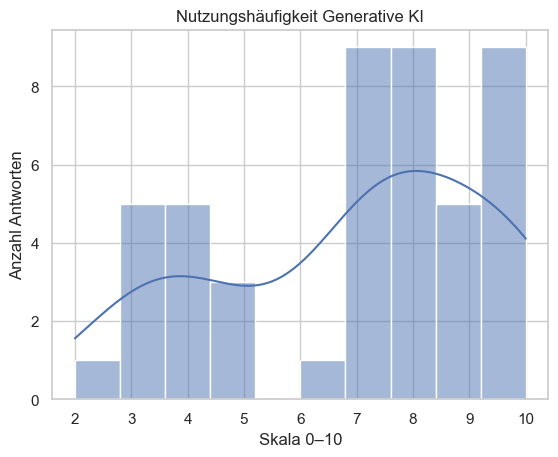

In [5]:
# Beispiel: Histogramm zur Nutzung generativer KI
column = 'Wie häufig nutzen Sie aktuell generative KI im Arbeitskontext? [Benutzung KI]'
if column in df.columns:
    sns.histplot(df[column].dropna(), bins=10, kde=True)
    plt.title('Nutzungshäufigkeit Generative KI')
    plt.xlabel('Skala 0–10')
    plt.ylabel('Anzahl Antworten')
    plt.show()
else:
    print(f'Spalte "{column}" nicht gefunden.')

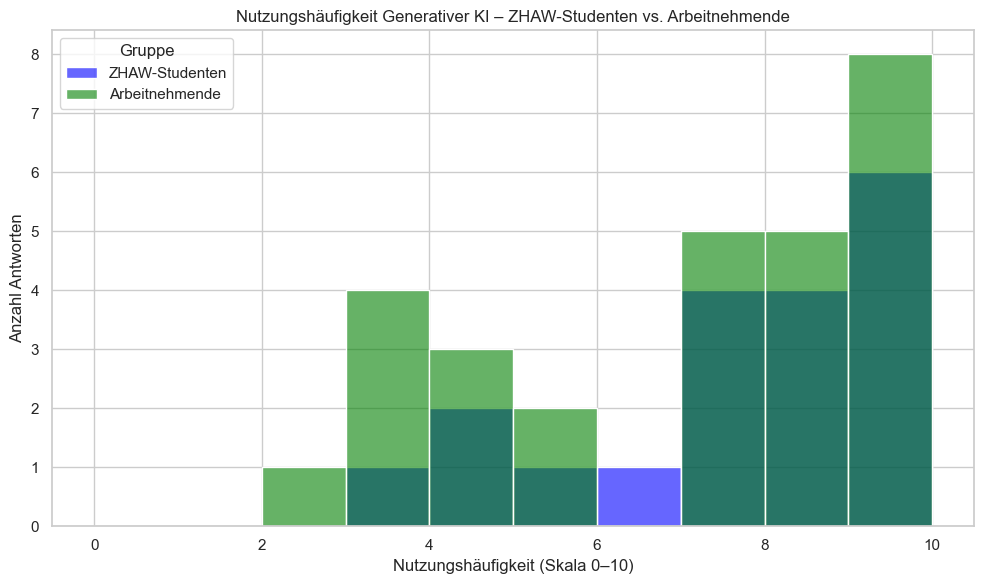

📊 Median Nutzungshäufigkeit ZHAW-Studenten: 8.00
📊 Median Nutzungshäufigkeit Arbeitnehmende: 7.00


In [6]:
import numpy as np

# Exakte Spaltennamen gemäss deinem DataFrame
column = 'Wie häufig nutzen Sie aktuell generative KI im Arbeitskontext? [Benutzung KI]'
email_column = 'Bitte geben Sie Ihre Studenten E-Mail Adresse ein:'

# Prüfung, ob beide Spalten vorhanden sind
if column in df.columns and email_column in df.columns:

    # Gruppierung nach E-Mail-Endung
    df['ZHAW_Student'] = df[email_column].astype(str).str.endswith("@students.zhaw.ch")

    # Gruppenwerte extrahieren
    zhaw = df[df['ZHAW_Student'] == True][column].dropna()
    arbeit = df[df['ZHAW_Student'] == False][column].dropna()

    # Histogramm mit beiden Gruppen
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 10, 11)

    sns.histplot(zhaw, bins=bins, color="blue", label="ZHAW-Studenten", kde=False, alpha=0.6)
    sns.histplot(arbeit, bins=bins, color="green", label="Arbeitnehmende", kde=False, alpha=0.6)

    plt.title("Nutzungshäufigkeit Generativer KI – ZHAW-Studenten vs. Arbeitnehmende")
    plt.xlabel("Nutzungshäufigkeit (Skala 0–10)")
    plt.ylabel("Anzahl Antworten")
    plt.legend(title="Gruppe")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Medianwerte berechnen und ausgeben
    median_zhaw = zhaw.median()
    median_arbeit = arbeit.median()

    print(f"📊 Median Nutzungshäufigkeit ZHAW-Studenten: {median_zhaw:.2f}")
    print(f"📊 Median Nutzungshäufigkeit Arbeitnehmende: {median_arbeit:.2f}")

else:
    print("❌ Eine oder beide der benötigten Spalten wurden nicht gefunden.")

/var/folders/2k/c1ct_2b11hl7zvvtlkp0f5ww0000gn/T/ipykernel_8665/1007708344.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=box_data, x="Gruppe", y=column, order=label_order,


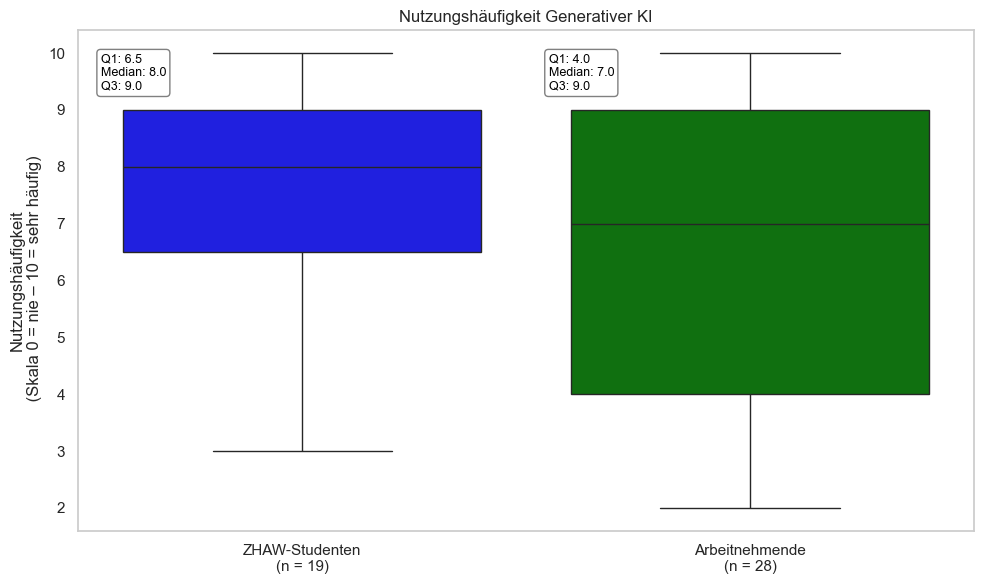

In [31]:
import numpy as np

# Gruppenspalte
df['Gruppe'] = df['ZHAW_Student'].map({True: "ZHAW-Studenten", False: "Arbeitnehmende"})

# Daten & Beschriftung
box_data = df[[column, 'Gruppe']].dropna()
gruppe_counts = box_data['Gruppe'].value_counts()
label_order = ["ZHAW-Studenten", "Arbeitnehmende"]
xtick_labels = [f"{g}\n(n = {gruppe_counts.get(g, 0)})" for g in label_order]

# Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=box_data, x="Gruppe", y=column, order=label_order,
                 palette={"ZHAW-Studenten": "blue", "Arbeitnehmende": "green"})

# Statistische Kennzahlen: Q1, Median, Q3
for i, group in enumerate(label_order):
    values = box_data[box_data["Gruppe"] == group][column].dropna()
    if len(values) == 0:
        continue

    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    median = np.median(values)

    stat_text = (f"Q1: {q1:.1f}\nMedian: {median:.1f}\nQ3: {q3:.1f}")

    # Position innerhalb der Grafik:
    if i == 0:
        # Linke Seite für ZHAW-Studenten
        x_pos = -0.45
    else:
        # Rechte Seite für Arbeitnehmende
        x_pos = -0.45

    y_pos = 10  # nah an oberer Y-Grenze

    ax.text(x=i + x_pos, y=y_pos, s=stat_text,
            ha='left', va='top', fontsize=9, color='black',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray"))

# Boxplot-Layout
plt.title("Nutzungshäufigkeit Generativer KI")
plt.xlabel("")
plt.ylabel("Nutzungshäufigkeit\n (Skala 0 = nie – 10 = sehr häufig)")
plt.xticks(ticks=[0, 1], labels=xtick_labels)
plt.grid(axis="y")
plt.tight_layout()
plt.show()